In [66]:
#Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt


In [67]:
#Load Dataset
data = pd.read_csv("student_performance.csv")
print(data.head())


   Hours_Studied  Attendance  Assignments_Submitted  Previous_Score  \
0              2        60.0                      2              50   
1              3        70.0                      3              55   
2              4        75.0                      3              60   
3              5        80.0                      4              65   
4              6        85.0                      4              70   

   Final_Score  
0           55  
1           60  
2           65  
3           70  
4           75  


In [68]:
print("Missing values before handling:")
print(data.isnull().sum())


Missing values before handling:
Hours_Studied            0
Attendance               1
Assignments_Submitted    0
Previous_Score           0
Final_Score              0
dtype: int64


In [69]:
#Handle Missing Values
data.fillna(data.mean(numeric_only=True), inplace=True)

In [70]:
print("\nMissing values after handling:")
print(data.isnull().sum())



Missing values after handling:
Hours_Studied            0
Attendance               0
Assignments_Submitted    0
Previous_Score           0
Final_Score              0
dtype: int64


In [71]:
#Feature and Target Selection
X = data[['Hours_Studied', 'Attendance', 'Assignments_Submitted', 'Previous_Score']]
y = data['Final_Score']

In [72]:
#Train Test Split
X_train, X_tst, y_train, y_tst = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
#Train the Multiple Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [74]:
#Predict and Evaluate
y_prd = model.predict(X_tst)
r2 = r2_score(y_test, y_prd)
mse = mean_squared_error(y_tst, y_prd)

print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R2 Score:", round(r2, 3))
print("Mean Squared Error:", round(mse, 3))

Model Coefficients: [2.1265861  0.10809121 0.55083259 0.46587004]
Intercept: 18.378517201053853
R2 Score: 0.995
Mean Squared Error: 0.981


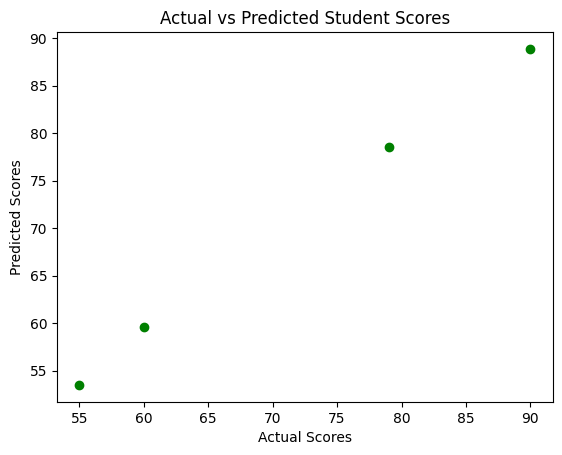

In [75]:
#Visualization
plt.scatter(y_tst, y_prd, color='green')
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Student Scores")
plt.show()

In [76]:
new_data = [[6, 85, 4, 70]]
predicted_score = model.predict(new_data)

print(f"Predicted Final Score: {predicted_score[0]:.2f}")

Predicted Final Score: 75.14


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
